In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture# Suppose Data X is a 2-D Numpy array (One apple has two features, size and flavor)
from data_loader import data_loader
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import scipy.stats

In [2]:
def make_ellipses(gmm, ax):
    colors = ["navy", "turquoise", "darkorange"]

    for n in range(gmm.means_.shape[0]):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:, :]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:, :]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], angle=180 + angle
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        #ax.set_aspect("equal", "datalim")

In [4]:
filename = 'trajectory.pkl'

n_clusters = 10
compute_reduction = 10
n_training_samples = 100

d_loader = data_loader(filename, compute_reduction, n_training_samples)               

X = d_loader.get_z(training=False)[:,7:9]

GMM = GaussianMixture(n_components=n_clusters, random_state=0, n_init=3,  init_params='kmeans').fit(X)
y = GMM.predict(X)

# sort samples into predicted classes for plotting
group = [np.array([0, 0]).reshape(1,-1)]*n_clusters
print(group[0].shape)
for i in range(X.shape[0]):
    #print(group[y[i]])
    #print(group[y[i]])
    #print(X[i])
    group[y[i]] = np.append(group[y[i]], X[i].reshape(1,-1), axis=0)

for n in range(len(group)):
    group[n] = group[n][1:,:]
    print(group[n].shape)

(1, 2)
(407, 2)
(13, 2)
(13, 2)
(49, 2)
(40, 2)
(145, 2)
(25, 2)
(19, 2)
(159, 2)
(130, 2)


In [5]:
# get the best representatives of each class
centers = np.empty(shape=(GMM.n_components, X.shape[1]))
for i in range(GMM.n_components):
    density = scipy.stats.multivariate_normal(cov=GMM.covariances_[i], mean=GMM.means_[i]).logpdf(X)
    centers[i, :] = X[np.argmax(density)]

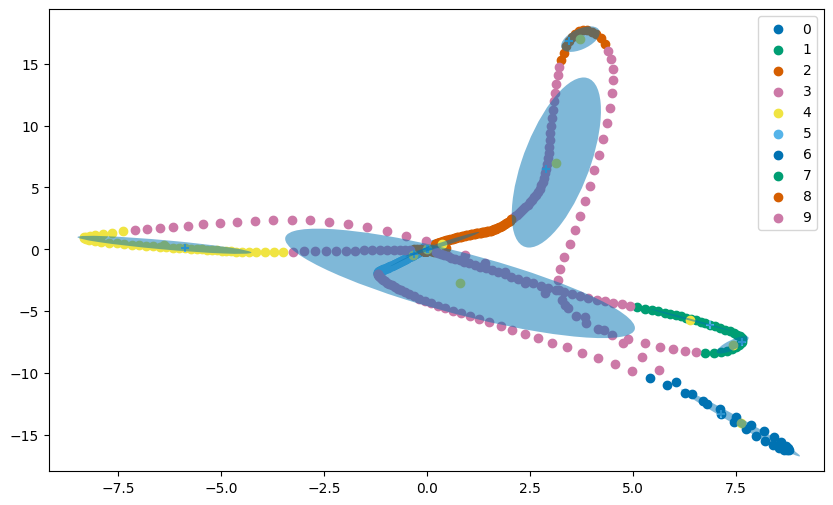

In [6]:
#fig = plt.figure(figsize=(10,6), dpi=100)
plt.style.use('seaborn-v0_8-colorblind')
fig, ax = plt.subplots(figsize=(10,6), dpi=100)


for n in range(len(group)):
    plt.scatter(group[n][:,0], group[n][:,1])
plt.scatter(GMM.means_[:,0], GMM.means_[:,1])
plt.scatter(centers[:,0], centers[:,1], marker='+')
plt.legend([f'{n}' for n in range(len(group))])
make_ellipses(GMM, ax)

In [8]:

n_clusters = 10

X = d_loader.get_z(training=False)

GMM = GaussianMixture(n_components=n_clusters, random_state=0, n_init=3,  init_params='kmeans').fit(X)
y = GMM.predict(X)

# sort samples into predicted classes for plotting
group = [np.zeros((1, X.shape[1]))]*n_clusters
#print(group[0].shape)
for i in range(X.shape[0]):
    group[y[i]] = np.append(group[y[i]], X[i].reshape(1,-1), axis=0)

for n in range(len(group)):
    group[n] = group[n][1:,:]
    print(group[n].shape)

(22, 17)
(263, 17)
(32, 17)
(127, 17)
(340, 17)
(42, 17)
(40, 17)
(30, 17)
(50, 17)
(54, 17)


(23, 2)
(273, 2)
(33, 2)
(117, 2)
(339, 2)
(43, 2)
(41, 2)
(30, 2)
(47, 2)
(54, 2)


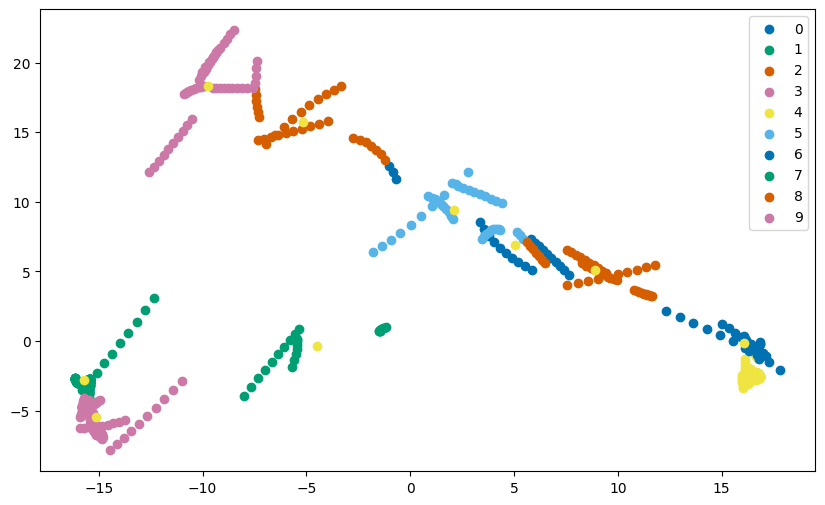

In [9]:
clf = LinearDiscriminantAnalysis(n_components=2)
clf.fit(X, y)

X_LDA = clf.transform(X)
y_LDA = clf.predict(X)


means_LDA = clf.transform(GMM.means_)

# sort samples into predicted classes for plotting
group = [np.zeros((1, X_LDA.shape[1]))]*n_clusters
#print(group[0].shape)
for i in range(X_LDA.shape[0]):
    group[y_LDA[i]] = np.append(group[y_LDA[i]], X_LDA[i].reshape(1,-1), axis=0)

for n in range(len(group)):
    group[n] = group[n][1:,:]
    print(group[n].shape)
    
    

plt.style.use('seaborn-v0_8-colorblind')
fig, ax = plt.subplots(figsize=(10,6), dpi=100)


for n in range(len(group)):
    plt.scatter(group[n][:,0], group[n][:,1])
plt.scatter(means_LDA[:,0], means_LDA[:,1])
plt.legend([f'{n}' for n in range(len(group))])
#make_ellipses(GMM, ax)



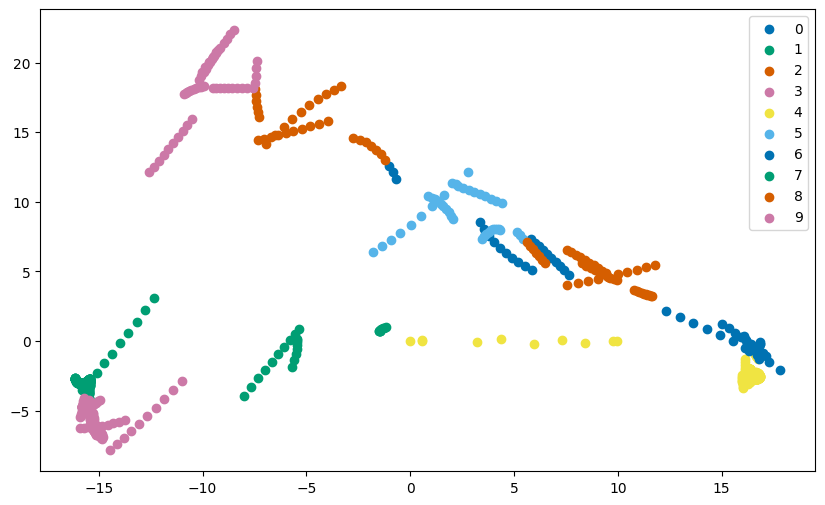

In [10]:
fig, ax = plt.subplots(figsize=(10,6), dpi=100)


for n in range(len(group)):
    plt.scatter(group[n][:,0], group[n][:,1])
plt.scatter(GMM.means_[:,0], GMM.means_[:,1])
plt.legend([f'{n}' for n in range(len(group))])
make_ellipses(GMM, ax)